**Deep neural networks for image classification task**



Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import normalize, to_categorical
import tensorflow as tf
from sklearn.metrics import accuracy_score, f1_score , confusion_matrix, precision_recall_fscore_support, classification_report

Loading and preparing the data

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [3]:
print('The shape of the training inputs:', x_train.shape)
print('The shape of the training labels:',y_train.shape)
print('The shape of the testing inputs:',x_test.shape)
print('The shape of the testing labels:',y_test.shape)

The shape of the training inputs: (50000, 32, 32, 3)
The shape of the training labels: (50000, 1)
The shape of the testing inputs: (10000, 32, 32, 3)
The shape of the testing labels: (10000, 1)


Plotting the data

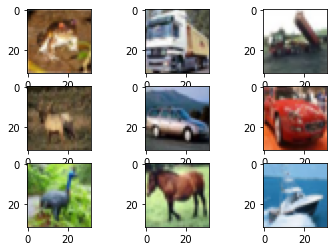

In [4]:
fig,axis=plt.subplots(3,3)
cnt=0
for i in range(3):
    for j in range(3):
        axis[i,j].imshow(x_train[cnt])
        cnt+=1

Normalize the data

In [5]:
x_train=normalize(x_train)
x_test=normalize(x_test)

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
x_train

array([[[[0.55517272, 0.58340184, 0.59281155],
         [0.5555908 , 0.59435295, 0.58143223],
         [0.61300108, 0.58848104, 0.52718093],
         ...,
         [0.67959661, 0.56776426, 0.46453439],
         [0.685736  , 0.56392763, 0.46016494],
         [0.67630692, 0.56663553, 0.47067306]],

        [[0.49236596, 0.61545745, 0.61545745],
         [0.        , 0.        , 0.        ],
         [0.91381155, 0.40613847, 0.        ],
         ...,
         [0.76431432, 0.54682651, 0.34176657],
         [0.7754459 , 0.54085723, 0.32581761],
         [0.76098548, 0.54266997, 0.3555424 ]],

        [[0.61695492, 0.59227672, 0.51824213],
         [0.91615733, 0.40081883, 0.        ],
         [0.86701902, 0.47774517, 0.14155413],
         ...,
         [0.77007489, 0.5481889 , 0.32630292],
         [0.77530769, 0.54271539, 0.32304487],
         [0.79131072, 0.52996039, 0.30490872]],

        ...,

        [[0.7291292 , 0.59592291, 0.33652117],
         [0.78859314, 0.60027239, 0.13339386]

In [8]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

Build the neural network

In [9]:
model=Sequential()
model.add(Flatten(input_shape=(32,32,3)))  #input layer
model.add(Dense(units=1024,activation=tf.nn.relu))
model.add(Dense(units=256, activation=tf.nn.relu))
model.add(Dense(units=128, activation=tf.nn.relu))
model.add(Dense(units=128, activation=tf.nn.relu))
model.add(Dense(units=10, activation=tf.nn.softmax))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 256)               262400    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 3459850 (13.20 MB)
Trainable params: 34598

Model Compilation

In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Training and testing

In [13]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=35, batch_size=200,verbose=1)

Epoch 1/35
250/250 [==============================] - 13s 52ms/step - loss: 1.8631 - accuracy: 0.3142 - val_loss: 1.8653 - val_accuracy: 0.3068
Epoch 2/35
250/250 [==============================] - 13s 52ms/step - loss: 1.8343 - accuracy: 0.3297 - val_loss: 1.7981 - val_accuracy: 0.3442
Epoch 3/35
250/250 [==============================] - 13s 53ms/step - loss: 1.8093 - accuracy: 0.3382 - val_loss: 1.8302 - val_accuracy: 0.3355
Epoch 4/35
250/250 [==============================] - 14s 54ms/step - loss: 1.7910 - accuracy: 0.3460 - val_loss: 1.7863 - val_accuracy: 0.3404
Epoch 5/35
250/250 [==============================] - 13s 52ms/step - loss: 1.7782 - accuracy: 0.3495 - val_loss: 1.7415 - val_accuracy: 0.3685
Epoch 6/35
250/250 [==============================] - 14s 55ms/step - loss: 1.7464 - accuracy: 0.3621 - val_loss: 1.7410 - val_accuracy: 0.3657
Epoch 7/35
250/250 [==============================] - 14s 55ms/step - loss: 1.7439 - accuracy: 0.3620 - val_loss: 1.7397 - val_accuracy:

Model Evaluation

In [14]:
loss1,tr_accuracy=model.evaluate(x_train,y_train)
print('Train accuracy = ',tr_accuracy)
loss2,te_accuracy=model.evaluate(x_test,y_test)
print('Test accuracy = ',te_accuracy)

1563/1563 [==============================] - 14s 4ms/step - loss: 1.4830 - accuracy: 0.4692
Train accuracy =  0.4692400097846985
313/313 [==============================] - 1s 4ms/step - loss: 1.6306 - accuracy: 0.4224
Test accuracy =  0.42239999771118164


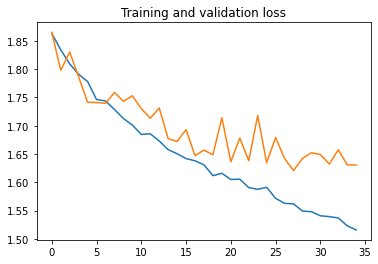

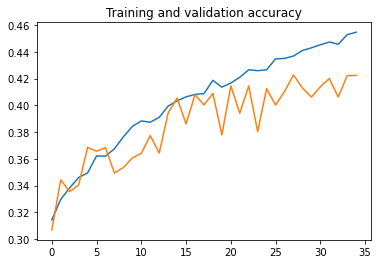

In [15]:
train_loss=history.history['loss']
val_loss=history.history['val_loss']

plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Training and validation loss')
plt.show()
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

plt.plot(train_acc)
plt.plot(val_acc)
plt.title('Training and validation accuracy')
plt.show()

In [16]:
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 [==============================] - 1s 4ms/step


In [17]:
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='weighted')

In [18]:
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'Support: {support}')

Precision: 0.42254054952076164
Recall: 0.4224
F1 Score: 0.4174614527159103
Support: None


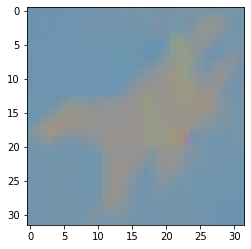

In [19]:
plt.imshow(x_test[10])
plt.show()

In [20]:
cm=confusion_matrix(y_true,y_pred)
print(cm)

[[501  81  28  48  17  14  46  31 173  61]
 [ 74 571  25  41  10  32  30  22  74 121]
 [108  62 349  76 103  76 120  46  37  23]
 [ 51  62  87 253  52 181 204  30  47  33]
 [ 61  22 163  61 352  54 148  82  49   8]
 [ 38  52  95 182  61 310 138  48  49  27]
 [ 18  17 111  70  96  56 582  26  10  14]
 [ 80  44  93  56  93  77  52 418  34  53]
 [158  96  18  43  20  26  22  11 558  48]
 [121 237  25  56  21  43  47  51  69 330]]


In [21]:
report=classification_report(y_true,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.41      0.50      0.45      1000
           1       0.46      0.57      0.51      1000
           2       0.35      0.35      0.35      1000
           3       0.29      0.25      0.27      1000
           4       0.43      0.35      0.39      1000
           5       0.36      0.31      0.33      1000
           6       0.42      0.58      0.49      1000
           7       0.55      0.42      0.47      1000
           8       0.51      0.56      0.53      1000
           9       0.46      0.33      0.38      1000

    accuracy                           0.42     10000
   macro avg       0.42      0.42      0.42     10000
weighted avg       0.42      0.42      0.42     10000



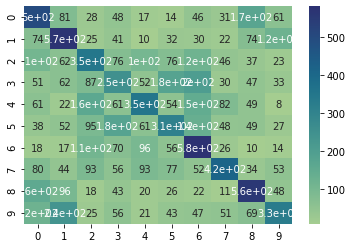

In [22]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='crest')
plt.show()